# The Decentralized RBC Model with Labor with Durable and Nondurable Consumption Goods

In this project, we will simulate the dynamic equilibrium of a decentralized (household makes their own decision) RBC model.
As usual, the model features an infinitely-lived household that chooses consumption, labor,
and capital accumulation to maximize the present value of its lifetime utility. However, the
household also chooses an amount of a durable consumption good to obtain. The durable
consumption good provides utility and gradually depreciates over time so it provides value
over time.

# The Model

A representative household lives for an infinite number of periods. The expected present
value of lifetime utility to the household from consuming nondurable goods C$_{0}$, C$_{1}$, C$_{2}$,...,
consuming durable goods D$_{0}$, D$_{1}$, D$_{2}$,..., and working L$_{0}$, L$_{1}$, L$_{2}$,...is denoted by U$_{0}$.

\begin{align} U_{0} = E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[logC_t+\eta{logD_t}+\varphi\log(1-L_t)]}\end{align}

where 0 < $\beta$ < 1 is the household's subjective discount factor, $\eta$ reflects the relative value
that the household places on the utility 
ow from durable goods, and $\varphi$ re
ects the relative
value that the household places on leisure in the utility function. ${E_0}$ denotes the expectation
with respect to all information available as of date 0.

The household enters period 0 with capital ${K_0}$ > 0. Production in period t is according
to a standard production function that has decreasing returns in capital ${K_t}$:

\begin{align}F(A_t, K_t) = (A_t, K_t^{\alpha}, L_t^{1-\alpha})\end{align}

where TFP $A_t$ is stochastic:

\begin{align}\log_{t+1} = \rho_{A}\log{A_{t}}+\epsilon_{t+1}^{A}\end{align}

The household's resource constraint in each period t is:

\begin{align} C_t+K_{t+1}+D_{t+1}=A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t\end{align}

where $\delta_k$ is the depreciation rate of capital and $\delta_d$ is the depreciation rate of durable consumption goods.

In period 0, the household solves:

\begin{align} max_{C_0,L_0,K_1}=E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[logC_t+\eta{logD_t}+\varphi\log(1-L_t)]} \end{align}
\begin{align} s.t.\;\; C_t+K_{t+1}+D_{t+1}=A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t\end{align}

which can be written as a choice of $L_0$, $K_1$, and $D_1$ only:

\begin{align} max_{L_0,K_1}=E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[log(A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t - K_{t+1}-D_{t+1})+\eta{logD_t}+\varphi\log(1-L_t)]} \end{align}

Recall the Cobb-Douglas production function:

\begin{align} Y_t = A_t K_t^{\alpha}L_t^{1-\alpha} \end{align}

where $Y$ denotes the production of final goods and services, $K$ is the stock of physical capital, $L$ is the labor force (either number of workers or number of worker hours), and $A$ is total factor productivity or $TFP$ which represents all other factors that might affect production that are not captured by $K, L$.

Goods Market Clearing Condition:
\begin{align} Y_t = C_t+K_{t+1}-(1-\delta_k)K_t+D_{t+1}-(1-\delta_d)D_t \end{align}

The condition represents the aggregate resource constraint for the economy.

We mentioned FTP quite a bit in the project so let's elaborate more on it. In the next few pages or so, we will use linear regression to estimate the relationship between TFP and GDP per worker using the data from Fred.
The data is called `cross_country_production.csv` is available here: https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_production.csv . The file contains production data in 2014 for 144 countries. In addition to the name and country code, the file contains production data for 144 countries in 2014:


| Name               | Description               | Units                       |
|--------------------|---------------------------|-----------------------------|
| `gdp`              | real GDP                  | Millions of 2001 US dollars |
| `labor`            | Average number of workers | Millions                    |
| `physical_capital` | Physical capital stock    | Millions of 2001 US dollars |
| `human_capital`    | Human capital per worker  | Index (unitless)            |

We can use the data to compute TFP for each country using the equation:
\begin{align}
A & = \frac{Y}{K^{\alpha}(hL)^{1-\alpha}}
\end{align}
where we added $h$ for human-capital per worker.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import linearsolve as ls
plt.style.use('classic')
%matplotlib inline

In [8]:
# Import data into a DataFrame called 'df'. Use the leftmost column as the index
df = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_production.csv', index_col = 0)

# Print the first five rows of the imported data
df.head()
df.shape

(144, 5)

In [9]:
# Add a column to df called 'gdp_pw' equal to GDP divided by labor divided by 1000 so units are in thousands of $
df['gdp_pw'] = df['gdp']/df['labor']/1000

# Add a column to df called 'physical_capital_pw' equal to physical capital divided by labor divided by 1000 so units are in thousands of $
df['physical_capital_pw'] = df['physical_capital']/df['labor']/1000

# Set alpha to 1/3
alpha =1/3

# Add a column to df called 'tfp' equal to TFP computed using the production function
df['tfp'] = df['gdp']/df['physical_capital']**alpha/(df['labor']*df['human_capital'])**(1-alpha)

# Sort the rows of df so that the GDP per worker column is in ascending order
df = df.sort_values('gdp_pw')

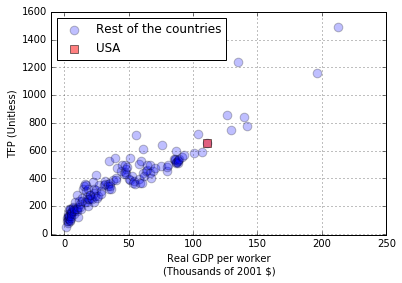

In [10]:
# Construct a scatter plot of TFP against real GDP per worker with:
#    1. All countries as blue circles, size 75, opacity (alpha) 0.25, label: 'All countries'
#    2. USA as red square, size 75, opacity (alpha) 0.5, label='USA'
#    3. Add a legend in the upper left corner with scatterpoints=1
#    4. x-axis limits: [-10,250]
#    4. y-axis limits: [-10,1600]
#    6. x-axis label: 'Real GDP capital per worker\n(Thousands of 2001 $)'
#    7. y-axis label: 'TFP (Unitless))'
#    8. Add a grid if you'd like

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'],df['tfp'],s=75,alpha=0.25,label='Rest of the countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()

## Estimate Relationship Between TFP and GDP per Worker

The Statsmodels module is an excellent tool for a broad range of statistical applications. Learn more about Statsmodels here: https://www.statsmodels.org/stable/index.html. We can use the module to estimate the relationship between TFP and GDP per worker in our data.

Since the scatter plot reveals some curvature in the relationship between TFP and GDP per worker, let's specifiy the linear regression model with the variables in logs:

\begin{align}
\log \text{TFP}_i & = \beta_0 + \beta_1 \log \text{GDP}_i + \epsilon_i
\end{align}

Once we've obtained the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can compute predicted values for TFP $\widehat{TFP}_i$ using by setting $\epsilon_i=0$ and solving the regression equation for TFP:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [11]:
# Import the Statsmodels module
import statsmodels.api as sm

In [15]:
# Create a variable called 'y' that will be to the dependent variable in the regression. This is Y
y = np.log(df['tfp'])

# Create a variable called 'x' that will be to the independent variable in the regression. 
# This is X or the explanatory variable
x = np.log(df['gdp_pw'])

# Use the function sm.add_constant() to add a constant to x
x = sm.add_constant(x)

# Print the first five rows of x
print(x.head())

              const    gdp_pw
country_code                 
CAF             1.0  0.315622
BDI             1.0  0.611815
NER             1.0  0.893346
MWI             1.0  0.913269
LBR             1.0  0.960224


In [7]:
# Create an OLS model using Statsmodels
model = sm.OLS(y,x)

# Fit the OLS model to data
results = model.fit()

# Print the summary2() method of results to print summary of regression results:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.905   
Dependent Variable: tfp              AIC:                -78.3129
Date:               2019-05-22 00:40 BIC:                -72.3732
No. Observations:   144              Log-Likelihood:     41.156  
Df Model:           1                F-statistic:        1359.   
Df Residuals:       142              Prob (F-statistic): 1.36e-74
R-squared:          0.905            Scale:              0.033524
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        4.1585     0.0463   89.8804   0.0000   4.0670   4.2499
gdp_pw       0.4936     0.0134   36.8661   0.0000   0.4671   0.5200
-----------------------------------------------------------------
Omnibus:              6.608        Durbin-Watson:           1.890
Prob(Omnibus):   

Estimated coefficients are stored in the `params` attribute of `results`. Residuals of the regression are stored in the attribute `resid`. And predicted values of the dependent variable are stored in `fittedvalues`.

In [8]:
# Print estimated coefficients of linear regression
print(results.params)

const     4.158469
gdp_pw    0.493573
dtype: float64


The cofficient on log GDP per worker is approximately 0.5 so we can conclude that a one percent increase in GDP per worker increases TFP by one half of a percent.

In [9]:
# Print R-squared of the regression
print(results.rsquared)

0.9054032510077362


The R-squared of the regression is 0.905 and we can conclude that GDP per worker explains over 90 percent of the variation in TFP.

In [10]:
# Print the first five rows of residuals.
print(results.resid.head())

country_code
CAF   -0.368663
BDI    0.253711
NER   -0.036212
MWI   -0.222537
LBR   -0.093016
dtype: float64


In [11]:
# Print the mean of the residuals of the regression.
print(results.resid.mean())

2.917419392487217e-15


In [12]:
# Create a variable called 'yhat' equal to the fitted values of y:
yhat = results.fittedvalues

# Print the first five rows of yhat
print(yhat.head())

country_code
CAF    4.314252
BDI    4.460445
NER    4.599401
MWI    4.609234
LBR    4.632410
dtype: float64


Recall that we can use estimated parameters can be used to compute out-of-sample predictions:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [13]:
# Create variable called 'gdp_values' that is an array from 0.1 to 300
gdp_values = np.arange(0.1,300,0.001)

# Create variable called 'beta0' equal to the constant of the regression
beta0 = results.params['const']

# Create variable called 'beta1' equal to the coefficient on log GDP per worker from the regression
beta1 = results.params['gdp_pw']

# Create a variable called 'ahat' that is equal to the predicted values of TFP corresponding to gdp_values
ahat = np.exp(beta0 + beta1*np.log(gdp_values))

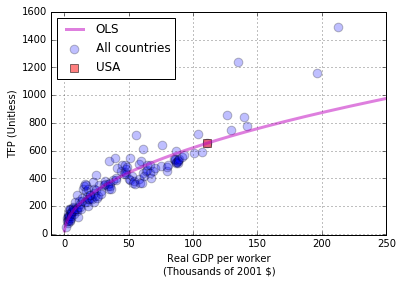

In [14]:
# Recreate the scatter plot of TFP against real GDP per worker with:
#    1. All features and settings from the previous plot
#    2. A plot of ahat against gdp_values; linewidth: 3, opacity: 0.5, label: 'OLS', color: magenta (c='m')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'],df['tfp'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.plot(gdp_values,ahat,c='m',lw=3,alpha=0.5,label='OLS')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()

We should have a better understanding about FTP and its relationship with other factors by now. Let's come back to our RBC model.

In [17]:
# Importing Nondurable Goods Data from the Federal Reserce at St. Louis, setting dates (first column) as 
# Index, seperating the columns, skiping other information on the webstie, and formating the dates. 

# Nondurable goods
df = pd.read_csv('https://fred.stlouisfed.org/data/PCND.txt',index_col=0,sep='\s+',skiprows=14,parse_dates = True)

# Durable goods
df2 = pd.read_csv('https://fred.stlouisfed.org/data/PCDG.txt',index_col=0,sep='\s+',skiprows=14,parse_dates = True)

# Replacing 'VALUE' columns name from respective data 
df.rename(columns={'VALUE': 'PCND'}, inplace=True)
df2.rename(columns={'VALUE': 'PCDG'}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ratio of Nondurable goods over Durable goods')

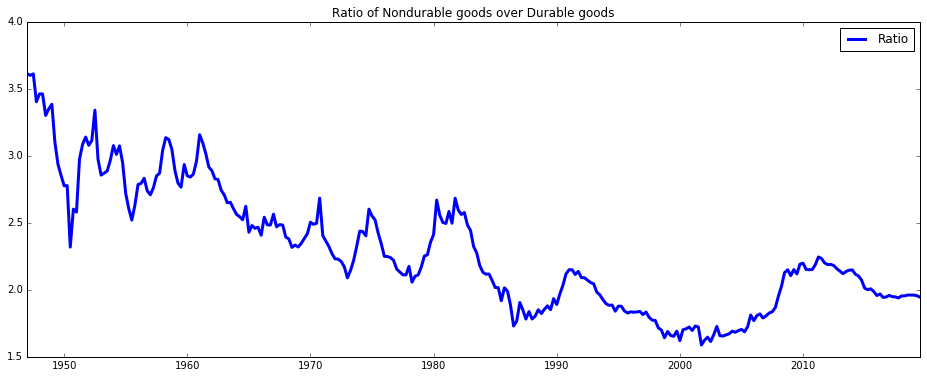

In [18]:
# Adding the durable goods data into the dataframe for non-durable goods

df['PCDG']=df2['PCDG']
df['DGND']=df['PCDG']+df['PCND']

# Adding a column for the ratio of nondurable goods to durable goods 

df['ratio']=df['PCND']/df['PCDG'] 

# Setting the graph figure size
plt.figure(figsize=(16,6))

# Ploting the ratio of nondurable goods to durable goods over time

plt.plot(df['ratio'], lw=3, label="Ratio")

# Inserting the ledgend for the graph 
plt.legend()
plt.title("Ratio of Nondurable goods over Durable goods")

In [19]:
# Finding the avrage of ratio for nondurable goods to durable goods 

print("Average Ratio=",np.round(np.average(df['ratio']),decimals=4))

Average Ratio= 2.2866


In [20]:
#Setting a variable for the avrage ratio

c_d=(np.average(df['ratio'])) 

In [21]:
# Storing the given parameter values into the a panda series 
parameters = pd.Series()
parameters['beta'] = 0.995
parameters['phi'] = 2.034915
parameters['alpha'] = 0.35
parameters['delta_k'] = 0.025
parameters['delta_d'] = 0.25
parameters['rho'] = 0.75
parameters['sigma_squared']= 0.006

# Finding eta(n) value with respect to the First order condition for the durable goods
parameters['n'] = (parameters.beta**-1-1+parameters.delta_d)/c_d
print(parameters)

beta             0.995000
phi              2.034915
alpha            0.350000
delta_k          0.025000
delta_d          0.250000
rho              0.750000
sigma_squared    0.006000
n                0.111532
dtype: float64


In [22]:
# Define a function to find the equlibrium conditions for the model using the FOCs
# This function be will initialized later using linearsolve module
def equilibrium_equations(variables_forward,variables_current,parameters):
    # Parameters
    p = parameters
    # Current variables.
    cur = variables_current
    # Forward variables. 
    fwd = variables_forward

    # Euler equation
    ee = p.beta*(p.alpha*fwd.a*fwd.k**(p.alpha-1)*fwd.l**(1-p.alpha)+1-p.delta_k)/(fwd.c) - 1/cur.c
    
    # Labor-labor choice
    ll = (1-p.alpha)*(cur.a)*(cur.k**p.alpha)*cur.l**(-p.alpha)/cur.c - p.phi/(1-cur.l)
    
    # Production function
    pf= cur.a*cur.k**p.alpha*cur.l**(1-p.alpha) - cur.y
    
    # Market clearing
    mc= cur.c+fwd.k-(1-p.delta_k)*cur.k+fwd.d-(1-p.delta_d)*cur.d -cur.y
    
    # Exogenous tfp
    tp = p.rho*np.log(cur.a) - np.log(fwd.a)
    

    #durable goods
    dg= p.beta*((1-p.delta_d)/fwd.c+p.n/fwd.d)-1/cur.c
    #stacking the equations 
    return np.array([
        ee,
        ll,
        pf,
        mc,
        tp,
        dg,
        ])

In [24]:
# Initializing the model using linearsolve (ls.) function and variable list, state variables orderd first, and excogenous shocks for each state variables
varNames = ['a','k','d','y','c','l']
shockNames = ['e_a','e_k','e_d']
model = ls.model(equations = equilibrium_equations,
                 nstates=3,
                 varNames=varNames,
                 shockNames=shockNames,
                 parameters=parameters)

help(ls.model)

Help on class model in module linearsolve:

class model(builtins.object)
 |  model(equations=None, nstates=None, varNames=None, shockNames=None, parameters=None, parameterNames=None)
 |  
 |  This program defines a class -- linearsolve.model -- with associated methods for solving and 
 |  simulating dynamic stochastic general equilibrium (DSGE) models.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, equations=None, nstates=None, varNames=None, shockNames=None, parameters=None, parameterNames=None)
 |      Initializing an instance linearsolve.model requires values for the following variables:
 |      
 |      Args:
 |          equations:       (fun) A function that represents the equilibirum conditions for a DSGE model.
 |                              The function should accept three arguments:
 |                                  * vars_fwd:     endogenous variables dated t+1
 |                                  * vars_cur:     endogenous variables dated t
 |                      

In [22]:
# Solve the steady state for the estimated variables from the variable guess using .compute_ss()
guess = [1,20,0.5,0.5,1,0.5]
model.compute_ss(guess)
print(model.ss)


a     1.000000
k    14.581033
d     0.349023
y     1.250850
c     0.799068
l     0.333343
dtype: float64


In [23]:
# Linear approximation of the model using the .approximate_and_solve()
model.approximate_and_solve()
print(model.approximated())

Log-linear equilibrium conditions:

0.0374·a[t+1]-0.0243·k[t+1]-1.2515·c[t+1|t]+0.0243·l[t+1|t] = -1.2515·c[t]

                                                          0 = -3.0524·a[t]-1.0683·k[t]+3.0524·c[t]+2.5946·l[t]

                                                          0 = -1.2508·a[t]-0.4378·k[t]+1.2508·y[t]-0.8131·l[t]

                                 14.581·k[t+1]+0.349·d[t+1] = 14.2165·k[t]+0.2618·d[t]+1.2508·y[t]-0.7991·c[t]

                                                    -a[t+1] = -0.75·a[t]

                             -0.3176·d[t+1]-0.9339·c[t+1|t] = -1.2515·c[t]


In [24]:
# Finding the impulse response to the shocks. In this case, 1% shock in TFP.
model.impulse(T =41,t0=5,shocks=[0.01,0,0])

# Results of first 10 period
print(model.xirs['e_a'].head(10))

    e_a         a         k         d         y         c         l
0  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
3  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
4  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
5  0.01  0.010000  0.000000  0.000000  0.016467  0.001543  0.009949
6  0.00  0.007500  0.001315  0.000551  0.012609  0.001880  0.007153
7  0.00  0.005625  0.002241  0.001225  0.009702  0.002103  0.005066
8  0.00  0.004219  0.002884  0.001697  0.007512  0.002241  0.003514
9  0.00  0.003164  0.003315  0.002018  0.005859  0.002317  0.002361


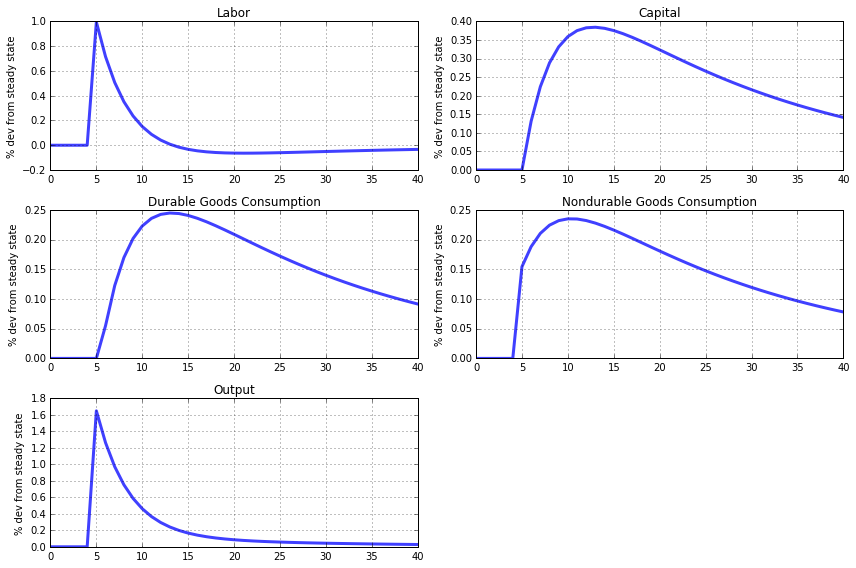

In [25]:
# Create figure. 

fig = plt.figure(figsize=(12,8))

# Create axis, with 3 rows and two columns

ax1 = fig.add_subplot(3,2,1)
(model.irs['e_a']['l']*100).plot(ax=ax1,lw=3,alpha=0.75,title='Labor',grid=True)
ax1.set_ylabel('% dev from steady state') 
ax2 = fig.add_subplot(3,2,2)
(model.irs['e_a']['k']*100).plot(ax=ax2,lw=3,alpha=0.75,title='Capital',grid=True)
ax2.set_ylabel('% dev from steady state')
ax3 = fig.add_subplot(3,2,3)
(model.irs['e_a']['d']*100).plot(ax=ax3,lw=3,alpha=0.75,title='Durable Goods Consumption',grid=True)
ax3.set_ylabel('% dev from steady state')
ax4 = fig.add_subplot(3,2,4)
(model.irs['e_a']['c']*100).plot(ax=ax4,lw=3,alpha=0.75,title='Nondurable Goods Consumption',grid=True)
ax4.set_ylabel('% dev from steady state')

ax5 = fig.add_subplot(3,2,5)
(model.irs['e_a']['y']*100).plot(ax=ax5,lw=3,alpha=0.75,title='Output',grid=True)
ax5.set_ylabel('% dev from steady state')

fig.tight_layout()

With 1% shock in TFP in period 5:
- Labor increases by 1 percent and drops tremendously then slowly returns to steady state.
- Output increases by 1.6 percent and drops tremendously then slowly returns to steady state.
- Consumptions increaes approximately 0.25 percent and slowly returns to steady state
- Capital increase approximately 0.35 percent and slowly returns to steady state


In [ ]:
# TFP captures the effects of changes in technology, institution and other productivity shocks.